# Memanggil Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-07-02 21:05:59.741767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751465159.778556    5365 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751465159.786267    5365 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751465159.808450    5365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751465159.808472    5365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751465159.808474    5365 computation_placer.cc:177] computation placer alr

*Warning* tersebut dari TensorFlow. Bisa cenderung diabaikan.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Preprocessing Dataset

In [3]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "train"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = "valid"
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [4]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (256, 256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (256, 256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True
)

Found 2454 images belonging to 3 classes.
Found 525 images belonging to 3 classes.


# Membuat model CNN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # ==================================================
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
     # ==================================================
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
     # ==================================================
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
     # ==================================================

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

/home/dean27/tutorial-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751465163.088967    5365 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2242 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Pesan diatas adalah pesan *warning* karena lapisan pertama tidak bisa menggunakan ```input_dim``` atau ```input_shape```. 
Pada *packages* tensorflow Sequential yang sekarang lebih memilih untuk menggunakan ```Input(shape)```, akan tetapi value yang kita
aplikasikan sama, sehingga pesan *warning* ini juga bisa kita abaikan.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,490,147 (24.76 MB)

 Trainable params: 6,490,147 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras import optimizers

opt = optimizers.SGD(learning_rate = 0.01)

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    verbose = 1
)

model.save("output-model.keras")

/home/dean27/tutorial-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1751465165.859848    5437 service.cc:152] XLA service 0x752db8003b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751465165.859892    5437 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-07-02 21:06:05.890524: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751465166.114693    5437 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-02 21:06:06.783934: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.12 = (f32[32,32,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0} %bitcast.4242, f32[32,3,3,3]{3,2,1,0} %bitcast.4249, f32[32]{0} %bitcast.4822), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$co

 1/77 ━━━━━━━━━━━━━━━━━━━━ 9:15 7s/step - accuracy: 0.3750 - loss: 1.0945

I0000 00:00:1751465172.106710    5437 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-07-02 21:06:15.806263: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.12 = (f32[22,32,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[22,3,256,256]{3,2,1,0} %bitcast.4242, f32[32,3,3,3]{3,2,1,0} %bitcast.4249, f32[32]{0} %bitcast.4822), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/dean27/tutorial-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3544 - loss: 1.0959

2025-07-02 21:06:45.849041: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.12 = (f32[32,32,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0} %bitcast.560, f32[32,3,3,3]{3,2,1,0} %bitcast.567, f32[32]{0} %bitcast.569), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/dean27/tutorial-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-02 21:06:46.102158: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially b

77/77 ━━━━━━━━━━━━━━━━━━━━ 53s 595ms/step - accuracy: 0.3545 - loss: 1.0959 - val_accuracy: 0.3333 - val_loss: 1.1001
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 447ms/step - accuracy: 0.4281 - loss: 1.0765 - val_accuracy: 0.4267 - val_loss: 1.1101
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 438ms/step - accuracy: 0.5584 - loss: 0.9523 - val_accuracy: 0.2057 - val_loss: 1.0684
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 502ms/step - accuracy: 0.6144 - loss: 0.8184 - val_accuracy: 0.7124 - val_loss: 0.8250
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 471ms/step - accuracy: 0.7177 - loss: 0.6474 - val_accuracy: 0.6819 - val_loss: 0.8413
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 529ms/step - accuracy: 0.7554 - loss: 0.5463 - val_accuracy: 0.6933 - val_loss: 0.8061
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 488ms/step - accuracy: 0.7916 - loss: 0.4669 - val_accuracy: 0.3714 - val_loss: 0.9910
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 507ms/step - accuracy: 0.7768 - loss: 0.5344 - val_accuracy: 0.771

*Warning* tersebut sama seperti pesan *warning* saat kita memanggil *packages* tensorflow. Bisa cenderung diabaikan saja.

<function matplotlib.pyplot.show(close=None, block=None)>

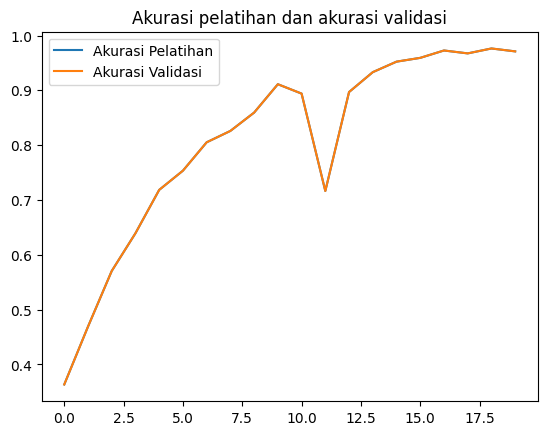

<Figure size 640x480 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Akurasi Pelatihan')
plt.plot(epochs, val_acc, label = 'Akurasi Validasi')
plt.title('Akurasi pelatihan dan akurasi validasi')
plt.legend(loc = 0)
plt.savefig('result/Hasil akurasi model.jpg')
plt.figure()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

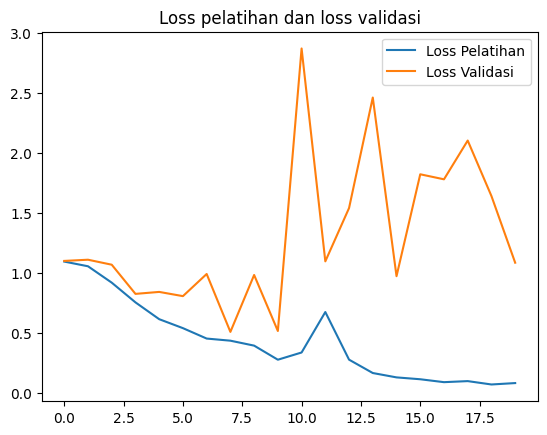

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(epochs, loss, label = 'Loss Pelatihan')
plt.plot(epochs, val_loss, label = 'Loss Validasi')
plt.title('Loss pelatihan dan loss validasi')
plt.legend(loc = 0)
plt.savefig('result/Hasil loss model.jpg')
plt.figure()
plt.show

# Menguji model

In [11]:
from tensorflow import keras
model = keras.models.load_model('output-model.keras')

In [12]:
import math

TEST_DIR = "test"
test_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (256, 256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

test_steps_per_epoch = math.ceil(test_generator.samples / test_generator.batch_size)

Found 525 images belonging to 3 classes.


In [13]:
predictions = model.predict(test_generator, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_name = test_generator.class_indices.keys()

/home/dean27/tutorial-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [14]:
import os
from os import listdir
import pandas as pd

healthy = os.listdir("test/healthy")
septoria = os.listdir("test/septoria")
stripe_rust = os.listdir("test/stripe_rust")

data = healthy + septoria + stripe_rust

df = pd.DataFrame()
df['Nama File'] = data
df['Ketebak'] = true_classes
df['Prediksi'] = predicted_classes

df.to_csv('result/Hasil pengujian model.csv')

# Mencari nilai matriks confusion

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

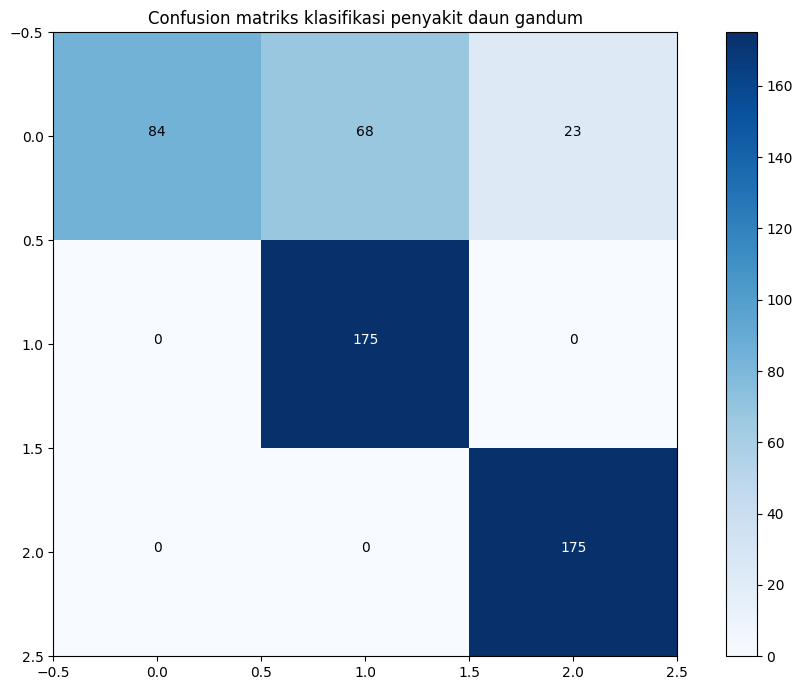

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks = (tick_marks, ['Healthy', 'Septoria', 'Stripe Rust'])
    plt.yticks = (tick_marks, ['Healthy', 'Septoria', 'Stripe Rust'])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), horizontalalignment = "center", color = "white" if
                cm[i, j] > thresh else "black")
        plt.tight_layout()

plt.savefig("result/Hasil Confusion Matriks.jpg")
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
plt.figure()

plot_confusion_matrix(cnf_matrix, classes = class_name, title = 'Confusion matriks klasifikasi penyakit daun gandum')

In [16]:
from sklearn import metrics
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
target_names = ['Healthy', 'Septoria', 'Stripe Rust']
report = metrics.classification_report(true_classes, predicted_classes, target_names = target_names)

print(report)

              precision    recall  f1-score   support

     Healthy       1.00      0.48      0.65       175
    Septoria       0.72      1.00      0.84       175
 Stripe Rust       0.88      1.00      0.94       175

    accuracy                           0.83       525
   macro avg       0.87      0.83      0.81       525
weighted avg       0.87      0.83      0.81       525

